# Proyecto 2 Emtech INTRODUCCIÓN AL ANÁLISIS DE DATOS

## -Martin Giovanni Montoya Arenas
### mmontoya126@ciencias.unam.mx

In [1]:
#Importamos las librerias que vamos a usar

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Cargamos la base de datos y asignamos cada columna a una variable en particular
datos = pd.read_csv('synergy_logistics_database.csv')
origen=datos["origin"]
destino=datos["destination"]
value=datos["total_value"]
año=datos["year"]
producto=datos["product"]
transporte=datos["transport_mode"]
compañia=datos["company_name"]
direccion=datos["direction"]
datos.head(10) #mostramos solos los primeros 10 valores

,register_id,direction,origin,destination,year,date,product,transport_mode,company_name,total_value
0,1,Exports,Japan,China,2015,31/01/15,Cars,Sea,Honda,33000000
1,2,Exports,Japan,China,2015,01/02/15,Cars,Sea,Honda,16000000
2,3,Exports,Japan,China,2015,02/02/15,Cars,Sea,Honda,29000000
3,4,Exports,Japan,China,2015,03/02/15,Cars,Sea,Honda,14000000
4,5,Exports,Japan,China,2015,04/02/15,Cars,Sea,Honda,17000000
5,6,Exports,Japan,China,2015,05/02/15,Cars,Sea,Honda,20000000
6,7,Exports,Japan,China,2015,06/02/15,Cars,Sea,Honda,27000000
7,8,Exports,Japan,China,2015,07/02/15,Cars,Sea,Honda,33000000
8,9,Exports,Japan,USA,2015,08/02/15,Machinery and electronics,Air,ReachExt J.J,15000000
9,10,Exports,Japan,USA,2015,09/02/15,Machinery and electronics,Air,ReachExt J.J,31000000


In [3]:
## Ciclo while para identificar las disferentes rutas que existen y con ello encontrar los valores asociados a esa ruta como:
#1.- Origen
#2.- Destino
#3.- Producto
#4.- Exportación o Importación
#5.- Año
#6.- Transporte
#7.- Compañia
#8.- Cantidad de operaciones
#9.- Valor total de todas las operaciones
i=0
j=0
orig=[]
desti=[]
contador=[]
valor=[]
product=[]
direction=[]
year=[]
transport=[]
company=[]

while i<len(datos):
    org, dest=origen[i], destino[i]
    cont=0
    val=0
    while j<len(datos):
        if org==origen[j]:
            if dest==destino[j]:     
                cont+=1
                val+=value[j]
            else:
                break
        else:
            break
        j+=1
    orig.append(org)
    product.append(producto[i])
    direction.append(direccion[i])
    year.append(año[i])
    transport.append(transporte[i])
    company.append(compañia[i])
    desti.append(dest)
    contador.append(cont)
    valor.append(val)
    i=j

#Creamos un data frame para un mejor manejo de los datos
resumen_df=pd.DataFrame(direction,columns=["Dirección"])
resumen_df.insert(1 ,"Origen",orig )
resumen_df.insert(2,"Destino", desti)
resumen_df.insert(3,"Contador", contador)
resumen_df.insert(4,"Año" , year)
resumen_df.insert(5,"Transporte", transport)
resumen_df.insert(6,"Compañia", company)
resumen_df.insert(7,"Producto", product)
resumen_df.insert(8,"Valor Tot", valor)

#Ordenamos los datos de mayor a menor respecto al número de operaciones, paa encontrar las rutas más demandadas
resumen_df = resumen_df.sort_values('Contador',ascending=False)

#Aquí se muestran las 10 rutas más demandadas
res_df=resumen_df[0:10]


  

In [4]:
resumen_df = resumen_df.sort_values('Valor Tot',ascending=False)
resumen_df.head(10)

,Dirección,Origen,Destino,Contador,Año,Transporte,Compañia,Producto,Valor Tot
15,Exports,China,Mexico,256,2019,Air,Huawei Technologies Co,Smartphones,11726000000
83,Exports,Canada,Mexico,186,2019,Rail,Black Forest Wood Co,Wood,7866000000
67,Exports,South Korea,Vietnam,493,2018,Sea,LG Electronics Inc,Integrated circuits,6877000000
82,Exports,France,Belgium,135,2018,Road,L Oreal Co,Cosmetics,5538000000
28,Exports,USA,Mexico,194,2017,Rail,Boeing Company,Aerospace Parts,4710000000
13,Exports,China,South Korea,126,2017,Rail,Lenovo Group Ltd,Computers,4450000000
81,Exports,France,United Kingdom,96,2018,Sea,Cubist Pharma F,Pharmaceuticals,3807000000
79,Exports,Germany,Italy,99,2017,Air,Bayer AG,Pharmaceuticals,3690000000
75,Exports,France,USA,103,2015,Sea,Cubist Pharma F,Pharmaceuticals,3402000000
59,Exports,Japan,Brazil,242,2020,Sea,Honda,Cars,3368000000


In [5]:
resumen_df.head(10)

,Dirección,Origen,Destino,Contador,Año,Transporte,Compañia,Producto,Valor Tot
15,Exports,China,Mexico,256,2019,Air,Huawei Technologies Co,Smartphones,11726000000
83,Exports,Canada,Mexico,186,2019,Rail,Black Forest Wood Co,Wood,7866000000
67,Exports,South Korea,Vietnam,493,2018,Sea,LG Electronics Inc,Integrated circuits,6877000000
82,Exports,France,Belgium,135,2018,Road,L Oreal Co,Cosmetics,5538000000
28,Exports,USA,Mexico,194,2017,Rail,Boeing Company,Aerospace Parts,4710000000
13,Exports,China,South Korea,126,2017,Rail,Lenovo Group Ltd,Computers,4450000000
81,Exports,France,United Kingdom,96,2018,Sea,Cubist Pharma F,Pharmaceuticals,3807000000
79,Exports,Germany,Italy,99,2017,Air,Bayer AG,Pharmaceuticals,3690000000
75,Exports,France,USA,103,2015,Sea,Cubist Pharma F,Pharmaceuticals,3402000000
59,Exports,Japan,Brazil,242,2020,Sea,Honda,Cars,3368000000


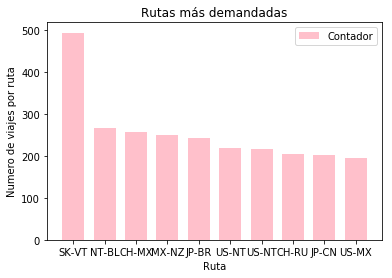

In [6]:
numero_de_grupos = 10

indice_barras = np.arange(numero_de_grupos)
ancho_barras =0.7
valor=res_df["Contador"]
ruta=res_df["Origen"]
plt.bar(indice_barras,valor, width=ancho_barras, label='Contador',color="pink")

plt.legend(loc='best')
## Se colocan los indicadores en el eje x
plt.xticks(indice_barras,["SK-VT","NT-BL","CH-MX","MX-NZ","JP-BR","US-NT","US-NT","CH-RU","JP-CN","US-MX"])
plt.ylabel('Numero de viajes por ruta')
plt.xlabel('Ruta')
plt.title('Rutas más demandadas')
 
plt.show()

In [7]:
i=0
j=0
trans=resumen_df["Transporte"]
trans=pd.unique(trans)
valor_total=resumen_df["Valor Tot"].sum()
cont_total=resumen_df["Contador"].sum()
transporte=[]
porcentaje_val=[]
porcentaje_cont=[]
valor=[]
contador=[]
while i<4:
    transport=trans[i]
    val=0
    cont=0
    j=0
    while j<len(resumen_df):
        if transport==resumen_df["Transporte"][j]:
            val+=resumen_df["Valor Tot"][j]
            cont+=resumen_df["Contador"][j]
        j+=1
    per_cont=cont/cont_total
    per_valor=val/valor_total
    transporte.append(transport)
    valor.append(val)
    porcentaje_val.append(per_valor*100)
    porcentaje_cont.append(per_cont*100)
    contador.append(cont)
    i+=1

#Creamos un data frame para un mejor manejo de los datos
transport_df=pd.DataFrame(transporte,columns=["Transporte"])
transport_df.insert(1 ,"Contador",contador )
transport_df.insert(2,"Valor Total", valor)
transport_df.insert(3 ,"% Demanda",porcentaje_cont )
transport_df.insert(4,"% Ventas", porcentaje_val)

#Ordenamos los datos de mayor a menor respecto al porcentaje de demanda
#para encontrar los medios de transporte más importantes
transport_df = transport_df.sort_values('% Demanda',ascending=False)
transport_df

,Transporte,Contador,Valor Total,% Demanda,% Ventas
2,Sea,10954,104697664000,57.483207,48.540514
1,Rail,3095,36588041000,16.241604,16.963151
3,Road,2527,34364488000,13.260915,15.932255
0,Air,2480,40041105000,13.014274,18.564080


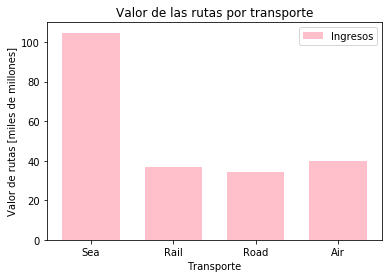

In [8]:
numero_de_grupos = 4

indice_barras = np.arange(numero_de_grupos)
ancho_barras =0.7
valor=transport_df["Valor Total"]/1000000000
 
plt.bar(indice_barras,valor , width=ancho_barras, label='Ingresos',color="pink")

plt.legend(loc='best')
## Se colocan los indicadores en el eje x
plt.xticks(indice_barras,transport_df["Transporte"])
plt.ylabel('Valor de rutas [miles de millones]')
plt.xlabel('Transporte')
plt.title('Valor de las rutas por transporte')
 
plt.show()

In [9]:
i=0
j=0
paises=np.concatenate((pd.unique(resumen_df["Origen"]),pd.unique(resumen_df["Destino"])), axis=0)
paises=pd.unique(paises)
valor_total=resumen_df["Valor Tot"].sum()
cont_total=resumen_df["Contador"].sum()
paiss=[]
porcentaje_val=[]
porcentaje_cont=[]
valor=[]
contador=[]

while i<len(paises):
    pais=paises[i]
    val=0
    cont=0
    j=0
    while j<len(resumen_df):
        if pais==resumen_df["Origen"][j]:
            val+=resumen_df["Valor Tot"][j]
            cont+=resumen_df["Contador"][j]
        if pais==resumen_df["Destino"][j]:
            val+=resumen_df["Valor Tot"][j]
            cont+=resumen_df["Contador"][j] 
        j+=1
    per_cont=cont/cont_total
    per_valor=val/valor_total
    paiss.append(pais)
    valor.append(val)
    porcentaje_val.append(per_valor*100)
    porcentaje_cont.append(per_cont*100)
    contador.append(cont)
    i+=1

#Creamos un data frame para un mejor manejo de los datos
pais_df=pd.DataFrame(paiss,columns=["Pais"])
pais_df.insert(1 ,"Contador",contador )
pais_df.insert(2,"Valor Total", valor)
pais_df.insert(3 ,"% Demanda",porcentaje_cont )
pais_df.insert(4,"% Ventas", porcentaje_val)

#Ordenamos los datos de mayor a menor respecto al porcentaje de ventas
#para encontrar los paises que más valor generan
pais_df = pais_df.sort_values('Valor Total',ascending=False)
pais_df=pais_df[0:5]
pais_df

,Pais,Contador,Valor Total,% Demanda,% Ventas
0,China,3775,59042038000,19.810034,27.373398
9,Mexico,2974,43249770000,15.606633,20.051699
4,USA,3386,40563715000,17.768682,18.806375
6,Japan,2774,34648128000,14.557095,16.063758
5,Germany,2843,32005684000,14.919186,14.838653


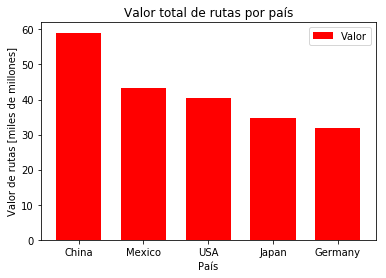

In [10]:
numero_de_grupos = 5

indice_barras = np.arange(numero_de_grupos)
ancho_barras =0.7

valor=pais_df["Valor Total"]/1000000000

plt.bar(indice_barras, valor, width=ancho_barras, label='Valor',color="red")

plt.legend(loc='best')
## Se colocan los indicadores en el eje x
plt.xticks(indice_barras,pais_df["Pais"])
plt.ylabel('Valor de rutas [miles de millones]')
plt.xlabel('País')
plt.title('Valor total de rutas por país')
 
plt.show()